In [1]:
# Blood, Urine, Respiratory sample, wound+ Pus, stool, 
# location
# IP
# OP
# IP less than 24 hours (ER)
# IP < 72 hrs
# IP > 72 hrs


In [2]:
import numpy as np; import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_excel("new_pred.xlsx")
data.head()

,Sheet Name,UHID,INPATIENTNO,AGE,GENDER,PATIENTSERVICE,No of Days from Admission,Ward Type,SPECIMENNAME,Organismname,...,Org_prob_1,Org_prob_2,Org_prob_3,Prediction1,Accuracy3,pred_proba_1,pred_proba_2,pred_proba_3,Prediction2,Prediction3
0,Delhi,APD1.0010001529,DEL1OPP244979,50,1,0,0.0,NaN,Urine,Klebsiella pneumoniae,...,0.615256,0.137570,0.051327,1,1,0.554651,0.077636,0.009459,1,0
1,Delhi,APD1.0010956961,DEL1OPP2169735,49,1,0,0.0,NaN,Urine,Proteus mirabilis,...,0.615256,0.137570,0.051327,1,1,0.553253,0.077440,0.014991,1,0
2,Delhi,APD1.0010000602,DELIP237166,84,1,1,11.0,1.0,BAL,Acinetobacter baumanii,...,0.195312,0.140625,0.132812,0,0,0.149057,0.020774,0.000088,0,0
3,Delhi,APD1.0010930075,DELIP228652,72,1,1,78.0,1.0,BAL,Providencia rettgeri,...,0.195312,0.140625,0.132812,0,0,0.173848,0.018069,0.000039,0,0
4,Delhi,APD1.0010930075,DELIP228652,72,1,1,78.0,1.0,Urine,Proteus mirabilis,...,0.460420,0.176090,0.080237,0,1,0.173848,0.018069,0.000039,0,0


In [4]:
data_urine = data.loc[data['SPECIMENNAME'] == "Urine"]
data_Blood = data.loc[data['SPECIMENNAME'] == 'Blood']
data_Respiratory = data.loc[(data['SPECIMENNAME'] == 'Sputum') | (data['SPECIMENNAME'] == 'Throat Swab') | (data['SPECIMENNAME'] =='Tracheal Secretion') | (data['SPECIMENNAME'] =='BAL')]
data_Wound_Pus = data.loc[(data['SPECIMENNAME'] == 'Wound Swab') | (data['SPECIMENNAME'] =='Pus')]
data_stool = data.loc[data['SPECIMENNAME'] == 'Stool']
data_Body_fluid = data.loc[data['SPECIMENNAME'] == 'Ascitic Fluid']

In [5]:
data = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data

,SPECIMENNAME,Organismname,Org_pred_1,Org_pred_2,Org_pred_3
0,Urine,Klebsiella pneumoniae,Escherichia coli,Klebsiella pneumoniae,Proteus mirabilis
1,Urine,Proteus mirabilis,Escherichia coli,Klebsiella pneumoniae,Proteus mirabilis
2,BAL,Acinetobacter baumanii,Escherichia coli,Klebsiella pneumoniae,Enterobacter cloacae
3,BAL,Providencia rettgeri,Escherichia coli,Klebsiella pneumoniae,Enterobacter cloacae
4,Urine,Proteus mirabilis,Escherichia coli,Klebsiella pneumoniae,Proteus mirabilis
...,...,...,...,...,...
103407,Wound Swab,Klebsiella pneumoniae,Klebsiella pneumoniae,Staphylococcus aureus,Escherichia coli
103408,Blood,Staphylococcus aureus,Coagulase negative staphylococcus,Escherichia coli,Klebsiella pneumoniae
103409,Blood,Staphylococcus aureus,Coagulase negative staphylococcus,Escherichia coli,Klebsiella pneumoniae
103410,Urine,Klebsiella pneumoniae,Escherichia coli,Klebsiella pneumoniae,Proteus mirabilis


In [6]:
speci_li = []
cosi_li = []

In [7]:
from collections import Counter
# data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# data2

# data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_urine = data
#del data_urine['SPECIMENNAME']
print(data_urine['Org_pred_2'])
print(le_or.fit_transform(data_urine['Org_pred_2']))


0         Klebsiella pneumoniae
1         Klebsiella pneumoniae
2         Klebsiella pneumoniae
3         Klebsiella pneumoniae
4         Klebsiella pneumoniae
                  ...          
103407    Staphylococcus aureus
103408         Escherichia coli
103409         Escherichia coli
103410    Klebsiella pneumoniae
103411    Klebsiella pneumoniae
Name: Org_pred_2, Length: 103412, dtype: object
[8 8 8 ... 6 8 8]


In [8]:
data_urine['SPECIMENNAME'] = le_or.fit_transform(data_urine['SPECIMENNAME'])
data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine



,SPECIMENNAME,Organismname,Org_pred_1,Org_pred_2,Org_pred_3
0,32,41,6,8,6
1,32,55,6,8,6
2,2,2,6,8,2
3,2,59,6,8,2
4,32,55,6,8,6
...,...,...,...,...,...
103407,34,41,7,12,4
103408,4,76,3,6,5
103409,4,76,3,6,5
103410,32,41,6,8,6


In [9]:

data3 = data_urine.head(25500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
print(cosi.shape )
# speci_li.append("Urine")
# cosi_li.append(
col_cosi.mean()

(25500, 25500)


0.8733273767320889

In [10]:
data_urine

,SPECIMENNAME,Organismname,Org_pred_1,Org_pred_2,Org_pred_3
0,32,41,6,8,6
1,32,55,6,8,6
2,2,2,6,8,2
3,2,59,6,8,2
4,32,55,6,8,6
...,...,...,...,...,...
103407,34,41,7,12,4
103408,4,76,3,6,5
103409,4,76,3,6,5
103410,32,41,6,8,6


In [11]:
data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data2

data_urine = data2.loc[data2['SPECIMENNAME'] == "Urine"]
data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_urine = data_Blood
del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
print(cosi)
cosi

col_cosi = cosi.mean()

speci_li.append("Blood")
cosi_li.append(col_cosi.mean())
# print("  specimen",col_cosi.mean())

ValueError: could not convert string to float: 'Delhi'

In [155]:
# data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# data2

# data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_urine = data_Respiratory
del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
speci_li.append("Respiratory")
cosi_li.append(col_cosi.mean())
# print(" data_Respiratory specimen",col_cosi.mean())

C:\Users\Raj Shukla\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [160]:
# data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# data2

# data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_urine = data_Wound_Pus
del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
speci_li.append("Wound_Pus")
cosi_li.append(col_cosi.mean())
# print(" data_Wound_Pus specimen",col_cosi.mean())

C:\Users\Raj Shukla\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [80]:
# data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# data2

# data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_urine = data_stool
del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
speci_li.append("Stool")
cosi_li.append(col_cosi.mean())
# print(" data_stool specimen",col_cosi.mean())

C:\Users\Raj Shukla\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [161]:
# data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# data2

# data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()
data_urine = data_Body_fluid
del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
speci_li.append("Body_fluid")
cosi_li.append(col_cosi.mean())
# print(" data_Body_fluid specimen",col_cosi.mean())

C:\Users\Raj Shukla\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [83]:
# # data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
# # data2

# # data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
# # data_urine

# from sklearn.preprocessing import LabelEncoder

# le_sp = LabelEncoder()
# le_or = LabelEncoder()

# del data_urine['SPECIMENNAME']

# data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
# data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
# data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
# data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
# data_urine


# data3 = data_urine.head(2500)
# cosi = cosine_similarity(data3)
# cosi

# col_cosi = cosi.mean()
# print(" Urine specimen",col_cosi.mean())

In [84]:
cosi_li

[0.9691725142049163,
 0.893805893698253,
 0.7170653162201824,
 0.9371734081202165,
 0.949419167436007,
 0.9715629572837168]

In [186]:
newd = pd.DataFrame()
newd['Specimen'] = speci_li
newd['cosine_similarity'] = cosi_li
newd.to_excel("specimen_cosine.xlsx")

In [48]:
# from sklearn.preprocessing import LabelEncoder

# le_sp = LabelEncoder()
# le_or = LabelEncoder()

# del data_urine['SPECIMENNAME']

# data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
# data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
# data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
# data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
# dat

C:\Users\Raj Shukla\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,Organismname,Org_pred_1,Org_pred_2,Org_pred_3
0,28,0,0,2
1,34,0,0,2
4,34,0,0,2
7,34,0,0,2
8,28,0,0,2
...,...,...,...,...
103394,22,0,0,2
103395,28,0,0,2
103396,22,0,0,2
103398,38,0,0,2


In [51]:
# cosine_similarity(data_urine)

In [50]:
# data3 = data_urine.head(2500)
# cosi = cosine_similarity(data3)
# cosi

array([[1.        , 0.99992123, 0.99992123, ..., 0.99912215, 1.        ,
        0.9998247 ],
       [0.99992123, 1.        , 1.        , ..., 0.99956925, 0.99992123,
        0.99998095],
       [0.99992123, 1.        , 1.        , ..., 0.99956925, 0.99992123,
        0.99998095],
       ...,
       [0.99912215, 0.99956925, 0.99956925, ..., 1.        , 0.99912215,
        0.99973136],
       [1.        , 0.99992123, 0.99992123, ..., 0.99912215, 1.        ,
        0.9998247 ],
       [0.9998247 , 0.99998095, 0.99998095, ..., 0.99973136, 0.9998247 ,
        1.        ]])

In [43]:
data2 = data[['SPECIMENNAME','Organismname','Org_pred_1','Org_pred_2','Org_pred_3']]
data2

data_urine = data2.loc[data['SPECIMENNAME'] == "Blood"]
data_urine

from sklearn.preprocessing import LabelEncoder

le_sp = LabelEncoder()
le_or = LabelEncoder()

del data_urine['SPECIMENNAME']

data_urine['Organismname'] = le_or.fit_transform(data_urine['Organismname'])
data_urine['Org_pred_1'] = le_or.fit_transform(data_urine['Org_pred_1'])
data_urine['Org_pred_2'] = le_or.fit_transform(data_urine['Org_pred_2'])
data_urine['Org_pred_3'] = le_or.fit_transform(data_urine['Org_pred_3'])
data_urine


data3 = data_urine.head(2500)
cosi = cosine_similarity(data3)
cosi

col_cosi = cosi.mean()
print(" xyz specimen",col_cosi.mean())

(2500, 2500)

In [44]:
col_cosi = cosi.mean()

In [45]:
col_cosi.mean()

0.893805893698253

In [92]:
data_plot = pd.read_excel('specimen_cosine.xlsx')
data_plot

,item,cosine_similarity
0,Urine specimen,0.969173
1,Blood specimen,0.893806
2,data_Respiratory specimen,0.717065
3,data_Wound_Pus specimen,0.937173
4,data_stool specimen,0.949419
5,data_Body_fluid specimen,0.971563
6,data_IP specimen,0.865083
7,data_OP specimen,0.957646
8,location delhi,0.855108
9,location data_Bangalore,0.904716


In [203]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt 
# figure(figsize=(12, 8), dpi=80)

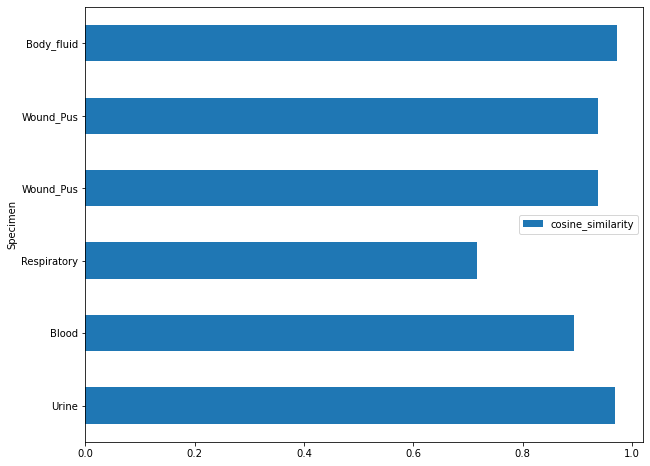

In [204]:
newd.plot.barh(x = 'Specimen')
# plt(figsize=(10, 6), dpi=80)
plt.rcParams["figure.figsize"] = (8,12)
plt.savefig('Specimen_cosine', dpi = 144)

In [191]:
newd

,Specimen,cosine_similarity
0,Urine,0.969173
1,Blood,0.893806
2,Respiratory,0.717065
3,Wound_Pus,0.937173
4,Wound_Pus,0.937173
5,Body_fluid,0.971563
